### Key Details : 
1. Submission By : Balaji T. Thiruvenkatachari
2. Date : May 2021
3. Problem : Happy Customer Bank looking  to cross sell its credit cards to its existing customers.
4. Solution : Business Objective is to classify the list of customers (test set) who could be potential leads for Credit Cards. 

### Key Technical / Analytics outcomes: 
1. To build a Binary Classification Model using Training Dataset (existing list of leads vs. non-leads) 
2. To use the Classification model  for scoring Target list of Bank Customers(Test data). 

### Training DataSet - Features : 
1. ID   				Unique Identifier for a row
2. Gender  			    Gender of the Customer
3. Age 				    Age of the Customer (in Years)
4. Region_Code  		Code of the Region for the customers
5. Occupation  			Occupation Type for the customer
6. Channel_Code 		Acquisition Channel Code for the Customer  (Encoded)
7. Vintage 			    Vintage for the Customer (In Months) / Duration of relationship with Bank
8. Credit_Product  		If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)
9. Avg_Account_Balance 	Average Account Balance for the Customer in last 12 Months
10. Is_Active 			If the Customer is Active in last 3 Months

### Training DataSet - Target Variable : 
11. Is_Lead(Target) 	If the Customer is interested for the Credit Card   0 : Customer is not interested  1 : Customer is interested

## Step 1 : Import key libraries and Data

In [49]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Import data from the Training file. Note: This data will be used for Training and Test the Model as initial process
# df_data = pd.read_csv(r"C:\bigdata\code\dsaClassification\av2021\train_s3TEQDk.csv")
df_data = pd.read_csv("train_s3TEQDk.csv")
df_data_copy = df_data.copy()
df_data.shape

(245725, 11)

## Step 2 : Exploratory Data Analysis

NOTE: To key the main model building and evaluation code readable and maintainable, I have seperate Exploratory Data Analysis to a seperate Notebook and used the analysis outcome / results here. 

### Numerical Variables (retaining the feature sequence number)
7. Vintage Vintage for the Customer (In Months)
3. Age Age of the Customer (in Years)
9. Avg_Account_Balance Average Account Balance for the Customer in last 12 Months
We convert this to Bins

### Analysis of Categorical Variables

#---------- Not so Good Predictors
1. Gender doesn't seem to be a major Predictor
2. Is_Active Doesn't seems to be a good Predictor
3. Region_code Doesn't seems to be a good Predictor - although some regions seem to have higher distribution of customers but percentage of lead wise don't see much difference

#---------- Good Predictors
1. Channel seems to be a good Predictor
2. Occupation seems to be a good Predictor
3. Credit_Product seems to be a okay Predictor

### Convert Average Account Balance, Vintage and Age to Categorical using Binning Approach

In [ ]:
# Usually Average Account balance is a good indicator of customer attributes in Banking scenario. 
# However, Average Account Balance is a numeric value. So we convert this into Categorical (Use concept of Binning).

# Similarly length of relationship with Bank is a good indicator of customer attributes in Banking scenario. 
# However, Vintage is a numeric value. So we convert this into Categorical (Use concept of Binning).

# Similarly Age of a Customer could be a good indicator of response to certain product promotions in Banking scenario (digital etc.)
# However, Age is a numeric value. So we convert this into Categorical (Use concept of Binning).

In [81]:
def fn_cat_to_num(p_df_data):
    bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond'] #Labels are data driven at this point - purely value based.
    p_df_data['AAB_Quantile'] = pd.qcut(p_df_data['Avg_Account_Balance'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
    
    bin_labels_5 = ['LessThan_20Months', '20To40_Months', '40To60_Months', '60To80_Months', '80OrMore_Months'] #Labels are data driven at this point - purely value based.
    p_df_data['Vintage_Quantile'] = pd.qcut(p_df_data['Vintage'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
    
    bin_labels_5 = ['LessThan_30Years', '30To40_Years', '40To50_Years', '50To60_Years', '60OrMore_Years'] #Labels are data driven at this point - purely value based.
    p_df_data['Age_Quantile'] = pd.qcut(p_df_data['Age'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
    return p_df_data;

In [53]:
df_data = fn_cat_to_num(df_data)

## Step 3 : Data Preparation / Processing for modeling 

## 3A : Missing Value imputation

In [54]:
#29235 Customers with Missing Credit Product information which is 11%
print("# of Customers with Missing Credit Products : ", df_data["Credit_Product"].isnull().sum())
# 72043 Customers have purchased a Credit Product which is 30% Remaining 60% have not purchased.
print("Split of Customers by Credit Products purchase Yes  / No : ",df_data["Credit_Product"].value_counts())

# So replaciing Credit_Product code values with "No" as that is 60% of the data
df_data["Credit_Product"].fillna("No", inplace = True)

# of Customers with Missing Credit Products :  29325
Split of Customers by Credit Products purchase Yes  / No :  No     144357
Yes     72043
Name: Credit_Product, dtype: int64


### 3B Feature Scaling
1. Few numeric values in the dataset with varying units like Age, Vintage and Avg_Account_Balance. 
2. Using Standardization since the data seems be follow Gaussian distribution

In [55]:
# This is not needed once we converted Numeric columns to Categorical using Binning for Better Features
# So have commented Feature Scaling

#df_data_copy = df_data.copy()

all_cols = df_data.columns.tolist()
num_cols = ['Age', 'Vintage','Avg_Account_Balance']
non_num_cols = list([x for x in all_cols if x not in num_cols])

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data. Using MinMaxScaler insted of StandardScaler since feature Selection expects postive values
# scaler = MinMaxScaler() 
# df_scaled = pd.DataFrame(scaler.fit_transform(df_data[num_cols]), columns = num_cols)
# print(df_scaled)

             Age   Vintage  Avg_Account_Balance
0       0.806452  0.281250             0.099205
1       0.112903  0.195312             0.054321
2       0.532258  0.148438             0.141660
3       0.177419  0.093750             0.043525
4       0.112903  0.203125             0.083823
...          ...       ...                  ...
245720  0.451613  0.796875             0.184373
245721  0.064516  0.062500             0.081516
245722  0.048387  0.046875             0.062903
245723  0.080645  0.187500             0.037432
245724  0.096774  0.109375             0.107295

[245725 rows x 3 columns]


In [17]:
#df_data_new = pd.concat([df_scaled, df_data[non_num_cols]], axis=1) #Horizontal Stacking
# df_data = df_data_new.copy()

### 3B : Categorical Data and Encoding 
Note: Most models expect numeric values. So we encode categorical values as Numerics

In [56]:
# cat = ['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
cat_columns = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'AAB_Quantile', 'Vintage_Quantile','Age_Quantile']

In [57]:
df_encoded = pd.get_dummies(df_data, columns=cat_columns)
# df_encoded_test = pd.get_dummies(df_data_test, columns=['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])
df_encoded

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,...,Vintage_Quantile_LessThan_20Months,Vintage_Quantile_20To40_Months,Vintage_Quantile_40To60_Months,Vintage_Quantile_60To80_Months,Vintage_Quantile_80OrMore_Months,Age_Quantile_LessThan_30Years,Age_Quantile_30To40_Years,Age_Quantile_40To50_Years,Age_Quantile_50To60_Years,Age_Quantile_60OrMore_Years
0,NNVBBKZB,73,RG268,43,1045696,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,IDD62UNG,30,RG277,32,581988,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,HD3DSEMC,56,RG268,26,1484315,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,BF3NC7KV,34,RG270,19,470454,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,TEASRWXV,30,RG282,33,886787,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,51,RG284,109,1925586,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
245721,HFNB7JY8,27,RG268,15,862952,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
245722,GEHAUCWT,26,RG281,13,670659,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
245723,GE7V8SAH,28,RG273,31,407504,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [58]:
# Quick analysis of Region Code shows that the Lead vs. No-Lead distribution is same across Region Codes. 
# So dropping Region Code
# Also the three numeric columns where converted to Categorical. So dropping this as well.

y = pd.DataFrame(df_encoded['Is_Lead'])
X = df_encoded.drop(['Is_Lead','ID', 'Region_Code', 'Age', 'Vintage','Avg_Account_Balance'], axis = 1)

In [59]:
y.value_counts()  # Is_Leads : 58288 and No_Leads is 187437

Is_Lead
0          187437
1           58288
dtype: int64

### 3C Split the Data (from training file) into Train and Test sets

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

## Step 4 : Feature Selection

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [62]:
# feature selection
def fn_select_features(X_train, y_train, X_test, num_features):
    features = SelectKBest(score_func=chi2, k=num_features)        
    features.fit(X_train, y_train)
    X_train_fs = features.transform(X_train)
    X_test_fs = features.transform(X_test)
    
    Column_list = X_train.columns[features.get_support(indices=True)].tolist()
    return X_train_fs, X_test_fs, Column_list

In [63]:
#Select Best 10 Features (Note : We have encoded Columns and there are many features post encoding)
X_train_TopN_features, X_test_TopN_features, Column_list = fn_select_features(X_train, y_train, X_test, num_features = 10)

In [64]:
X_train, X_test = X_train_TopN_features, X_test_TopN_features

In [65]:
print(X_train.shape, X_test.shape)  # Validate selection of Top N Features. This is to improve model performance

(172007, 10) (73718, 10)


In [67]:
print("Key Top-N Features Selected")
print(Column_list)

Key Top-N Features Selected
['Occupation_Entrepreneur', 'Occupation_Salaried', 'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3', 'Vintage_Quantile_20To40_Months', 'Vintage_Quantile_80OrMore_Months', 'Age_Quantile_LessThan_30Years', 'Age_Quantile_30To40_Years', 'Age_Quantile_50To60_Years']


## Step 5 : Build the Binary Classification Models

### Import necessary Classification Libraries from Sci-kit Learn 

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

### Following is a generic function to train a set of Classification Models and Store the performance metrics for evaluation

In [69]:
def fn_run_classfiers(X_train, y_train, X_test, y_test) -> pd.DataFrame:
    '''
    PURPOSE:  Script to test Classification Models and comparing Classification Performance across Models for evaluation
    PARAMETERS:
        1 - X_train : DataFrame of Training Data - Features
        2 - y_train : DataFrame of Training Data - Target
        3 - X_test  : DataFrame of Test Data - Features
        4 - y_test  : DataFrame of Test Data - Target
    RETURN:
        Function Returns a DataFrame with Prediction Outcomes by Model
    ''' 
    datasets = []    
    lst_models = [
           ('LogReg', LogisticRegression()), 
           ('GNB', GaussianNB()),
#           ('KNN', KNeighborsClassifier()),
#           ('SVM', SVC()), 
           ('RF', RandomForestClassifier()),
           ('XGB', XGBClassifier())
         ]
    
    lst_results = []
    lst_names = []
    lst_scoring = ['roc_auc', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    
    lst_scoring = ['roc_auc', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    lst_target_names = ['Not_A_Lead', 'Is_Lead']
    
    for model_name, model in lst_models:
        print("Model Running : ", model_name)
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=lst_scoring)
        clf = model.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        print(model_name)
        print(classification_report(y_test, y_pred, target_names=lst_target_names))
        
        lst_results.append(cv_results)
        lst_names.append(model_name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = model_name
        datasets.append(this_df)
                        
        final = pd.concat(datasets, ignore_index=True)

    return final

### Train the Models using K-Fold Cross validation
Note: Few algorithms (namely SVM and KNN) took longtime to train (execution time) in my Laptop with limited resources. 
So while I have shown the approach but not able to show the SVM / KNN results. 

In [70]:
df_scored_values = fn_run_classfiers(X_train, y_train, X_test, y_test)

Model Running :  LogReg
LogReg
              precision    recall  f1-score   support

  Not_A_Lead       0.78      0.99      0.88     56189
     Is_Lead       0.85      0.11      0.20     17529

    accuracy                           0.78     73718
   macro avg       0.82      0.55      0.54     73718
weighted avg       0.80      0.78      0.72     73718

Model Running :  GNB
GNB
              precision    recall  f1-score   support

  Not_A_Lead       0.84      0.70      0.76     56189
     Is_Lead       0.38      0.58      0.46     17529

    accuracy                           0.67     73718
   macro avg       0.61      0.64      0.61     73718
weighted avg       0.73      0.67      0.69     73718

Model Running :  RF
RF
              precision    recall  f1-score   support

  Not_A_Lead       0.79      0.99      0.88     56189
     Is_Lead       0.80      0.13      0.23     17529

    accuracy                           0.79     73718
   macro avg       0.79      0.56      0.55     7

In [71]:
df_scored_values.groupby(['model']).agg([np.std, np.mean])

fit_time            score_time           test_roc_auc            \
             std       mean        std      mean          std      mean   
model                                                                     
GNB     0.006204   0.106994   0.005357  0.139793     0.005209  0.713700   
LogReg  0.135424   0.765358   0.006227  0.089595     0.006501  0.739598   
RF      0.089506  11.389975   0.002489  1.358725     0.005209  0.749939   
XGB     0.573229  13.686649   0.003674  0.285984     0.005213  0.749973   

       test_accuracy           test_precision_weighted            \
                 std      mean                     std      mean   
model                                                              
GNB         0.003781  0.672205                0.003908  0.732920   
LogReg      0.001310  0.783927                0.003387  0.796544   
RF          0.001265  0.785259                0.004054  0.789870   
XGB         0.001296  0.785224                0.003831  0.789837   

       test_recall_weighted           test_f1_weighted            
                        std      mean              std      mean  
model                                                             
GNB                0.003781  0.672205         0.003633  0.692210  
LogReg             0.001310  0.783927         0.002237  0.713342  
RF                 0.001265  0.785259         0.001915  0.718778  
XGB                0.001296  0.785224         0.002133  0.718694

In [72]:
# target_strings = label_encoder.inverse_transform(np.arange(num_classes))
# metrics.classification_report(dev_gold, dev_predicted, target_names=target_strings)

## Step 6 : Evaluate the Models and Select one for Scoring of Customers in Test Data file

In [73]:
# After evaluation of the Scores - F1 Score (0.87) and ROC_AUC (0.757) , choose the RF Model.
# Could have choosen Boosting Based model but considering relatively better explanatory power using RandomForest for final model
c_model_rf = RandomForestClassifier()
c_model_rf.fit(X_train, y_train.values.ravel())
y_train_predicted  = c_model_rf.predict(X_train)

In [74]:
# evaluate predictions
y_test_predicted  = c_model_rf.predict(X_test)
y_test_predicted_proability = c_model_rf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_test_predicted)
print('Accuracy: %.2f' % (accuracy*100))
fpr, tpr, thresh = roc_curve(y_test, y_test_predicted_proability[:,1], pos_label=1)
print(fpr, tpr, thresh)

Accuracy: 78.57
[0.00000000e+00 5.33912332e-05 7.11883109e-05 8.89853886e-05
 1.06782466e-04 1.24579544e-04 1.60173699e-04 1.60173699e-04
 1.77970777e-04 1.95767855e-04 1.95767855e-04 2.13564933e-04
 6.22897720e-04 1.17460713e-03 1.21020128e-03 1.24579544e-03
 1.42376622e-03 1.47715745e-03 2.17124348e-03 2.43819965e-03
 2.54498211e-03 2.84753244e-03 2.88312659e-03 3.52382139e-03
 3.75518340e-03 3.77298048e-03 3.87976294e-03 4.44926943e-03
 4.46706651e-03 4.55605190e-03 4.73402267e-03 5.41031163e-03
 5.55268825e-03 7.35019310e-03 7.35019310e-03 8.61378562e-03
 9.25448041e-03 9.98416060e-03 1.00019577e-02 1.01799285e-02
 2.76210646e-02 2.94541636e-02 2.94897578e-02 2.96321344e-02
 5.20564523e-02 8.80599406e-02 8.80955347e-02 1.48463222e-01
 1.50420901e-01 1.53926925e-01 1.61971204e-01 1.62594102e-01
 1.63234797e-01 1.85214188e-01 1.92422004e-01 1.92582178e-01
 1.93650003e-01 1.94450871e-01 2.28265319e-01 3.00201107e-01
 3.00236701e-01 3.49249853e-01 4.52811048e-01 4.56299276e-01
 4.68205

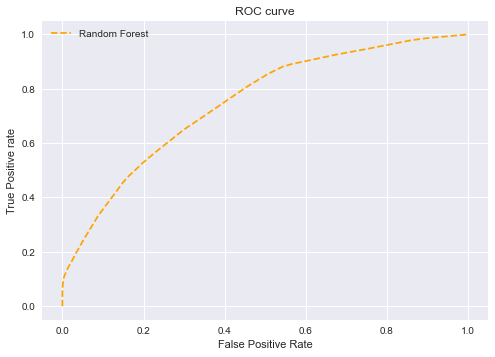

In [75]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')
plt.title('ROC curve')  # Title
plt.xlabel('False Positive Rate')  # X Axis Label
plt.ylabel('True Positive rate')   # Y Axis Label
plt.legend(loc='upper left')
plt.savefig('ROC',dpi=300)
plt.show();

In [76]:
print("Key Features Selected ")
print(Column_list) 
# ['Vintage', 'Occupation_Entrepreneur', 'Occupation_Salaried', 'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3']

Key Features Selected 
['Occupation_Entrepreneur', 'Occupation_Salaried', 'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3', 'Vintage_Quantile_20To40_Months', 'Vintage_Quantile_80OrMore_Months', 'Age_Quantile_LessThan_30Years', 'Age_Quantile_30To40_Years', 'Age_Quantile_50To60_Years']


In [82]:
# Import data from the Training file. Note: This data will be used for Training and Test the Model as initial process
# df_data_test = pd.read_csv(r"C:\bigdata\code\dsaClassification\av2021\test_mSzZ8RL.csv")
df_data_testset = pd.read_csv("test_mSzZ8RL.csv")
df_data_testset_copy = df_data_testset.copy()

df_data_testset = fn_cat_to_num(df_data_testset)  #Numerical To Categorical Coversion / Binning 
df_encoded_testset = pd.get_dummies(df_data_testset, columns=cat_columns)

#df_encoded_testset
#y = pd.DataFrame(df_encoded_testset['Is_Lead'])

X = df_encoded_testset.drop(["ID", "Region_Code"], axis = 1)

In [83]:
X_testset_selected_features = X[Column_list]

# y_testset_predicted_proba = c_model_rf.predict_proba(X_testset_selected_features)
y_testset_predicted = pd.DataFrame(c_model_rf.predict(X_testset_selected_features), columns = ["Is_Lead_Scored"])

In [85]:
df_testset_scored = pd.concat([X, y_testset_predicted], axis=1) #Horizontal Stacking
df_testset_scored = pd.concat([df_data_testset_copy['ID'], df_testset_scored], axis=1) #Horizontal Stacking
df_testset_scored

,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,...,Vintage_Quantile_20To40_Months,Vintage_Quantile_40To60_Months,Vintage_Quantile_60To80_Months,Vintage_Quantile_80OrMore_Months,Age_Quantile_LessThan_30Years,Age_Quantile_30To40_Years,Age_Quantile_40To50_Years,Age_Quantile_50To60_Years,Age_Quantile_60OrMore_Years,Is_Lead_Scored
0,VBENBARO,29,25,742366,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,CCMEWNKY,43,49,925537,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,VK3KGA9M,31,14,215949,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,TT8RPZVC,29,33,868070,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,SHQZEYTZ,29,19,657087,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,52,86,4242558,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
105308,CWQ72DWS,55,86,1159153,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
105309,HDESC8GU,35,15,1703727,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
105310,2PW4SFCA,53,93,737178,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
### Final Selected Model for Classification is LR

In [88]:
df_testset_scored[["ID","Is_Lead_Scored"]].to_csv("test_mSzZ8RL_scored_by_stbalaji.csv", index = False, columns = ["ID","Is_Lead"])

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Is_Lead'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"